# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, precision_recall_curve

# 데이콘 점수

In [4]:
# 자체 점수 : 
# 제출 점수(제출 날짜) : 

# 설정

In [5]:
# cat
# one_hot_max_size = 2
# random_state : 5(range(10, 60, 10))
# iterations = 1000
# early_stopping_rounds = 50
# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'
# probability_threshold

In [6]:
# 제거된 특성(7개)
# 'id',
# 'contents_open_dt',
# 'contents_rn',
# 'person_prefer_f',
# 'person_prefer_g',
# 'h_m_match_yn',
# 'h_s_match_yn'

# 데이터 불러오기

In [7]:
# train = pd.read_csv('../data/df_train.csv')
# test = pd.read_csv('../data/df_test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [9]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [11]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [12]:
# 제거된 특성(7개)
# 'id',
# 'contents_open_dt',
# 'contents_rn',
# 'person_prefer_f',
# 'person_prefer_g',
# 'h_m_match_yn',
# 'h_s_match_yn'

In [13]:
# 삭제할 특성
pop_col = ['id',
'contents_open_dt',
'contents_rn',
'person_prefer_f',
'person_prefer_g',
'h_m_match_yn',
'h_s_match_yn']
len(pop_col)

7

In [14]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [17]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [18]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## 카테고리형 특성으로 지정할 특성

In [19]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [20]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [21]:
cat_f = train.columns.tolist()
numeric_cat = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
for col in numeric_cat:
  cat_f.remove(col)
cat_f.remove('target')

In [22]:
# 56 - 5 = 51개
len(cat_f)

51

# train, test 셋 준비

In [23]:
train.shape

(501951, 56)

In [24]:
X = train.drop(['target'], axis=1)
X.shape

(501951, 55)

In [25]:
y = train[['target']]
y.shape

(501951, 1)

# 모델 훈련/예측

In [28]:
score_df = pd.DataFrame(index=['thr_전', 'thr_후'])
pred_proba_df = pd.DataFrame()
thr_df = pd.DataFrame()
imp_df = pd.DataFrame(index=X.columns)

for random_state in tqdm(range(10, 60, 10)):
  temp_score_list =[]
  # 데이터 셋 나누기
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=random_state, shuffle=True, stratify=y)
  # 모델 생성
  cat = CatBoostClassifier(random_state=0, task_type='GPU', iterations=1000, early_stopping_rounds=50,
                        cat_features=cat_f, eval_metric='F1', one_hot_max_size=2)
  # 모델 훈련
  cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
  
  # 기본 평가
  val_pred = cat.predict(X_val)
  f1_score_raw = f1_score(y_val, val_pred)
  temp_score_list.append(f1_score_raw)

  # precision, recall, threshold 값 계산
  val_pred_proba = cat.predict_proba(X_val)
  precisions, recalls, thresholds = precision_recall_curve(y_val, val_pred_proba[:,1])
  threshold_boundary = thresholds.shape[0]

  # 최고 F1 값을 갖는 threshold 값 구하기
  pre = precisions[:threshold_boundary]
  re = recalls[:threshold_boundary]
  f1 = 2 * pre * re / (pre + re)
  optimal_idx = np.argmax(f1)
  optimal_threshold = thresholds[optimal_idx]
  thr_df[f'{random_state}'] = [optimal_threshold]

  # 구한 threshold값으로 제한해서 예측
  # 1의 예측값만 불러와도 되므로 [:,1]사용
  val_pred_th =  (val_pred_proba[:,1] >= optimal_threshold)
  val_pred_th = val_pred_th.astype(int)

  # threshold로 제한한 예측 평가
  f1_score_mod = f1_score(y_val, val_pred_th)
  temp_score_list.append(f1_score_mod)
  score_df[f'{random_state}'] = temp_score_list

  print("===============================================")
  print(f"random_state : {random_state}")
  print("threshold 적용 전 f1 score :", f1_score_raw)
  print("threshold 적용 후 f1 score :", f1_score_mod)
  print("===============================================")
  print()

  # test 셋 예측
  pred_proba = cat.predict_proba(test)
  pred_proba_df[f'{random_state}'] = pred_proba[:,1]

  # 특성 중요도
  imp_df[f'{random_state}'] = cat.get_feature_importance()
  
# about 7m

  0%|          | 0/5 [00:00<?, ?it/s]

Learning rate set to 0.043012
0:	learn: 0.6289916	test: 0.6369533	best: 0.6369533 (0)	total: 204ms	remaining: 3m 24s
100:	learn: 0.6498104	test: 0.6644111	best: 0.6648326 (98)	total: 13.3s	remaining: 1m 58s
200:	learn: 0.6584953	test: 0.6774366	best: 0.6776721 (195)	total: 26.8s	remaining: 1m 46s
300:	learn: 0.6635946	test: 0.6803486	best: 0.6804000 (293)	total: 40.3s	remaining: 1m 33s
bestTest = 0.6809451472
bestIteration = 342
Shrink model to first 343 iterations.
random_state : 10
threshold 적용 전 f1 score : 0.6809451471716276
threshold 적용 후 f1 score : 0.7094454747422322



 20%|██        | 1/5 [01:24<05:37, 84.40s/it]

Learning rate set to 0.043012
0:	learn: 0.6214787	test: 0.6263718	best: 0.6263718 (0)	total: 223ms	remaining: 3m 42s
100:	learn: 0.6499388	test: 0.6641161	best: 0.6641161 (100)	total: 13.9s	remaining: 2m 3s
200:	learn: 0.6597071	test: 0.6776910	best: 0.6779995 (198)	total: 27.5s	remaining: 1m 49s
300:	learn: 0.6644250	test: 0.6802259	best: 0.6804398 (281)	total: 41.1s	remaining: 1m 35s
bestTest = 0.6809155014
bestIteration = 329
Shrink model to first 330 iterations.
random_state : 20
threshold 적용 전 f1 score : 0.6809155014464803
threshold 적용 후 f1 score : 0.7084353325173399



 40%|████      | 2/5 [02:47<04:10, 83.65s/it]

Learning rate set to 0.043012
0:	learn: 0.6372737	test: 0.6426669	best: 0.6426669 (0)	total: 192ms	remaining: 3m 11s
100:	learn: 0.6503009	test: 0.6648182	best: 0.6648182 (100)	total: 13.6s	remaining: 2m 1s
200:	learn: 0.6589091	test: 0.6764616	best: 0.6764616 (200)	total: 27.2s	remaining: 1m 48s
300:	learn: 0.6634665	test: 0.6802648	best: 0.6802648 (300)	total: 41.2s	remaining: 1m 35s
400:	learn: 0.6674101	test: 0.6805213	best: 0.6807464 (379)	total: 54.6s	remaining: 1m 21s
bestTest = 0.6807463914
bestIteration = 379
Shrink model to first 380 iterations.
random_state : 30
threshold 적용 전 f1 score : 0.6807463914103115
threshold 적용 후 f1 score : 0.7088283999823697



 60%|██████    | 3/5 [04:18<02:53, 86.86s/it]

Learning rate set to 0.043012
0:	learn: 0.6281949	test: 0.6336476	best: 0.6336476 (0)	total: 209ms	remaining: 3m 28s
100:	learn: 0.6486299	test: 0.6637707	best: 0.6637707 (100)	total: 13.6s	remaining: 2m 1s
200:	learn: 0.6579867	test: 0.6778411	best: 0.6778464 (199)	total: 26.9s	remaining: 1m 46s
300:	learn: 0.6624816	test: 0.6809105	best: 0.6809343 (299)	total: 40.7s	remaining: 1m 34s
bestTest = 0.6812016372
bestIteration = 307
Shrink model to first 308 iterations.
random_state : 40
threshold 적용 전 f1 score : 0.6812016372382063
threshold 적용 후 f1 score : 0.7074401810461006



 80%|████████  | 4/5 [05:37<01:24, 84.04s/it]

Learning rate set to 0.043012
0:	learn: 0.6199482	test: 0.6193318	best: 0.6193318 (0)	total: 197ms	remaining: 3m 16s
100:	learn: 0.6506271	test: 0.6644427	best: 0.6644427 (100)	total: 13.4s	remaining: 1m 59s
200:	learn: 0.6596170	test: 0.6764160	best: 0.6765593 (199)	total: 26.9s	remaining: 1m 46s
300:	learn: 0.6642193	test: 0.6789169	best: 0.6790738 (298)	total: 40.8s	remaining: 1m 34s
400:	learn: 0.6674370	test: 0.6794201	best: 0.6802776 (356)	total: 54.1s	remaining: 1m 20s
bestTest = 0.6802775534
bestIteration = 356
Shrink model to first 357 iterations.
random_state : 50
threshold 적용 전 f1 score : 0.6802775533625787
threshold 적용 후 f1 score : 0.7100804676183244



100%|██████████| 5/5 [07:04<00:00, 84.97s/it]


# 특성 중요도

In [29]:
imp_df

,10,20,30,40,50
d_l_match_yn,7.685942,7.533514,8.545406,7.883538,6.964797
d_m_match_yn,4.224678,4.007059,3.998572,4.461469,4.205521
d_s_match_yn,0.310612,0.354984,0.388517,0.283681,0.281396
h_l_match_yn,2.256198,2.131677,2.005757,2.265420,2.117489
person_attribute_a,0.479109,0.402770,0.331355,0.418217,0.335046
person_attribute_a_a,1.145839,1.552586,1.803960,1.561443,1.458598
person_attribute_b,0.884517,0.995613,0.945314,1.089771,0.994404
person_prefer_c,0.819327,0.835265,0.888730,1.068694,0.792318
person_prefer_d_1,1.902065,2.124531,1.736224,2.069630,1.676363
person_prefer_d_2,0.717824,0.886031,0.500918,0.594003,0.831687


In [30]:
imp_df['mean'] = imp_df.mean(axis=1)
imp_df

,10,20,30,40,50,mean
d_l_match_yn,7.685942,7.533514,8.545406,7.883538,6.964797,7.722640
d_m_match_yn,4.224678,4.007059,3.998572,4.461469,4.205521,4.179460
d_s_match_yn,0.310612,0.354984,0.388517,0.283681,0.281396,0.323838
h_l_match_yn,2.256198,2.131677,2.005757,2.265420,2.117489,2.155308
person_attribute_a,0.479109,0.402770,0.331355,0.418217,0.335046,0.393299
person_attribute_a_a,1.145839,1.552586,1.803960,1.561443,1.458598,1.504485
person_attribute_b,0.884517,0.995613,0.945314,1.089771,0.994404,0.981924
person_prefer_c,0.819327,0.835265,0.888730,1.068694,0.792318,0.880867
person_prefer_d_1,1.902065,2.124531,1.736224,2.069630,1.676363,1.901763
person_prefer_d_2,0.717824,0.886031,0.500918,0.594003,0.831687,0.706093


In [32]:
import matplotlib.pyplot as plt

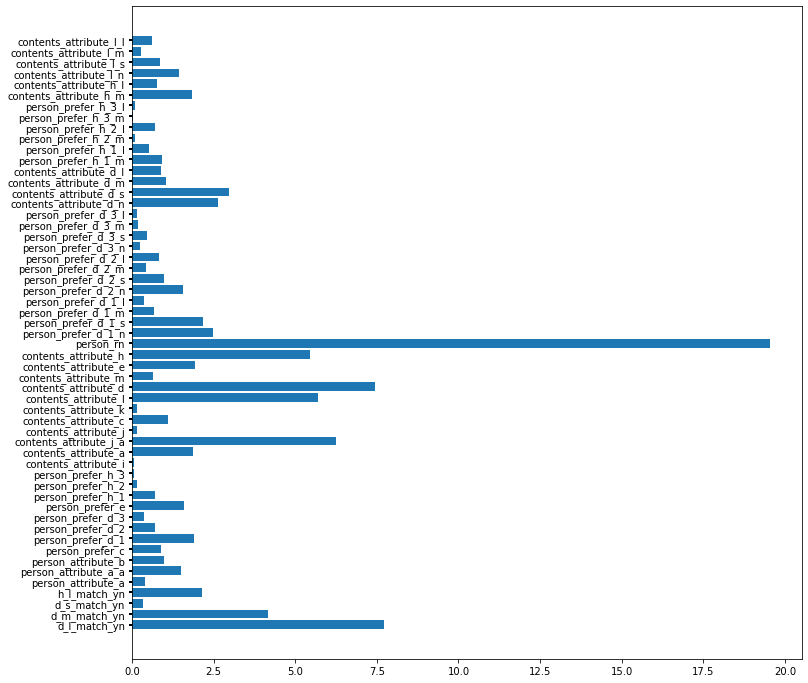

In [34]:
plt.figure(figsize=(12,12))
plt.barh(X.columns, imp_df['mean'])
plt.tick_params(axis='y', width=2)

In [38]:
imp_df['mean'].sort_values()

person_prefer_h_3_m        0.033817
person_prefer_h_3          0.058462
contents_attribute_i       0.073446
person_prefer_h_3_l        0.099782
person_prefer_h_2_m        0.101297
person_prefer_d_3_l        0.142294
contents_attribute_k       0.143530
person_prefer_h_2          0.145626
contents_attribute_j       0.145674
person_prefer_d_3_m        0.171526
person_prefer_d_3_n        0.229786
contents_attribute_l_m     0.276958
d_s_match_yn               0.323838
person_prefer_d_3          0.350366
person_prefer_d_1_l        0.359853
person_attribute_a         0.393299
person_prefer_d_2_m        0.439925
person_prefer_d_3_s        0.463823
person_prefer_h_1_l        0.513432
contents_attribute_l_l     0.600137
contents_attribute_m       0.644801
person_prefer_d_1_m        0.685368
person_prefer_h_2_l        0.696269
person_prefer_h_1          0.700991
person_prefer_d_2          0.706093
contents_attribute_h_l     0.770767
person_prefer_d_2_l        0.816833
contents_attribute_l_s     0

In [37]:
imp_df['mean'].describe()

count    55.000000
mean      1.818182
std       3.045712
min       0.033817
25%       0.355110
50%       0.855867
75%       1.885253
max      19.539271
Name: mean, dtype: float64

## 결과 종합

In [39]:
score_df

,10,20,30,40,50
thr_전,0.680945,0.680916,0.680746,0.681202,0.680278
thr_후,0.709445,0.708435,0.708828,0.707440,0.710080


### 오류난 특성 제거

In [ ]:
# del_col = ['30', '40', '60', '70']
# pred_proba_df = pred_proba_df.drop(del_col, axis=1)
# thr_df = thr_df.drop(del_col, axis=1)
# score_df = score_df.drop(del_col, axis=1)

In [40]:
pred_proba_df['mean'] = pred_proba_df.mean(axis=1)
thr_df['mean'] = thr_df.mean(axis=1)
score_df['mean'] = score_df.mean(axis=1)

### threshold 값

In [41]:
thr_df

,10,20,30,40,50,mean
0,0.384397,0.389605,0.374826,0.394066,0.389104,0.3864


## 자체평가

In [42]:
score_df

,10,20,30,40,50,mean
thr_전,0.680945,0.680916,0.680746,0.681202,0.680278,0.680817
thr_후,0.709445,0.708435,0.708828,0.707440,0.710080,0.708846


## test 예측

In [ ]:
pred = pred_proba_df['mean'].tolist() >= thr_df['mean'].values
pred = pred.astype(int)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([10802, 35602]))

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


# 제출파일 생성

In [ ]:
sub['target'] = pred
sub['target'].value_counts()

1    35602
0    10802
Name: target, dtype: int64

In [ ]:
file_ver = '5.8.1'
# sub.to_csv(f'sub_ver{file_ver}.csv', index=False)
sub.to_csv(f'/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver{file_ver}.csv', index=False)

# 코드 마지막